**German Loan Applications**

German Credit data was sourced from the Penn State Dept. of Statistics under Creative Commons license CC BY-NC 4.0.

* A single-column .csv with features and values separated by semicolons.






In [5]:
import pandas as pd

file_path = 'german.csv'
df = pd.read_csv(file_path)
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                         --------------  ----- 
 0   Creditability;Account_Balance;Durati

(None,
   Creditability;Account_Balance;Duration_of_Credit_monthly;Payment_Status_of_Previous_Credit;Purpose;Credit_Amount;Value_Savings_Stocks;Length_of_current_employment;Instalment_per_cent;Sex_Marital_Status;Guarantors;Duration_in_Current_address;Most_valuable_available_asset;Age_years;Concurrent_Credits;Type_of_apartment;No_of_Credits_at_this_Bank;Occupation;No_of_dependents;Telephone;Foreign_Worker
 0     1;1;18;4;2;1049;1;2;4;2;1;4;2;21;3;1;1;3;1;1;1                                                                                                                                                                                                                                                                                                                                                           
 1      1;1;9;4;0;2799;1;3;2;3;1;2;1;36;3;1;2;3;2;1;1                                                                                                                                          

**I. Data Cleaning**

The single column collection needed to be split into 21 unique columns and datatypes to needed to be converted to numeric in some instances.

In [6]:
# Split the dataset into proper columns using the semicolon separator
df_split = pd.DataFrame(df.iloc[:, 0].str.split(';', expand=True))

df_split.columns = ["Creditability", "Account_Balance", "Duration_of_Credit_monthly", "Payment_Status_of_Previous_Credit", "Purpose",
                    "Credit_Amount", "Value_Savings_Stocks", "Length_of_current_employment", "Instalment_per_cent", "Sex_Marital_Status",
                    "Guarantors", "Duration_in_Current_address", "Most_valuable_available_asset", "Age_years", "Concurrent_Credits",
                    "Type_of_apartment", "No_of_Credits_at_this_Bank", "Occupation", "No_of_dependents", "Telephone", "Foreign_Worker"]

# Convert relevant columns to numeric data types where necessary
for col in ["Creditability", "Duration_of_Credit_monthly", "Credit_Amount", "Instalment_per_cent", "Age_years", "No_of_Credits_at_this_Bank", "No_of_dependents"]:
    df_split[col] = pd.to_numeric(df_split[col], errors='coerce')

df_split_info = df_split.info()
df_split_head = df_split.head()

df_split_info, df_split_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Creditability                      1000 non-null   int64 
 1   Account_Balance                    1000 non-null   object
 2   Duration_of_Credit_monthly         1000 non-null   int64 
 3   Payment_Status_of_Previous_Credit  1000 non-null   object
 4   Purpose                            1000 non-null   object
 5   Credit_Amount                      1000 non-null   int64 
 6   Value_Savings_Stocks               1000 non-null   object
 7   Length_of_current_employment       1000 non-null   object
 8   Instalment_per_cent                1000 non-null   int64 
 9   Sex_Marital_Status                 1000 non-null   object
 10  Guarantors                         1000 non-null   object
 11  Duration_in_Current_address        1000 non-null   object
 12  Most_va

(None,
    Creditability Account_Balance  Duration_of_Credit_monthly  \
 0              1               1                          18   
 1              1               1                           9   
 2              1               2                          12   
 3              1               1                          12   
 4              1               1                          12   
 
   Payment_Status_of_Previous_Credit Purpose  Credit_Amount  \
 0                                 4       2           1049   
 1                                 4       0           2799   
 2                                 2       9            841   
 3                                 4       0           2122   
 4                                 4       0           2171   
 
   Value_Savings_Stocks Length_of_current_employment  Instalment_per_cent  \
 0                    1                            2                    4   
 1                    1                            3               

**Explore examples of loan denials**

In [8]:
df_zeros = df_split[df_split['Creditability'] == 0]
print(df_zeros.head(5))

     Creditability Account_Balance  Duration_of_Credit_monthly  \
22               0               2                          36   
45               0               1                          18   
47               0               4                          18   
97               0               2                          36   
110              0               1                          15   

    Payment_Status_of_Previous_Credit Purpose  Credit_Amount  \
22                                  2       5           2384   
45                                  2       0           1216   
47                                  4       6           1864   
97                                  3       9           4455   
110                                 2       0           3959   

    Value_Savings_Stocks Length_of_current_employment  Instalment_per_cent  \
22                     1                            2                    4   
45                     1                            2         

In [10]:
loan_denials = df_split[df_split['Creditability'] == 0].shape[0]
print("Number of loan denials:", loan_denials)

Number of loan denials: 300


**Explore feature correlations**

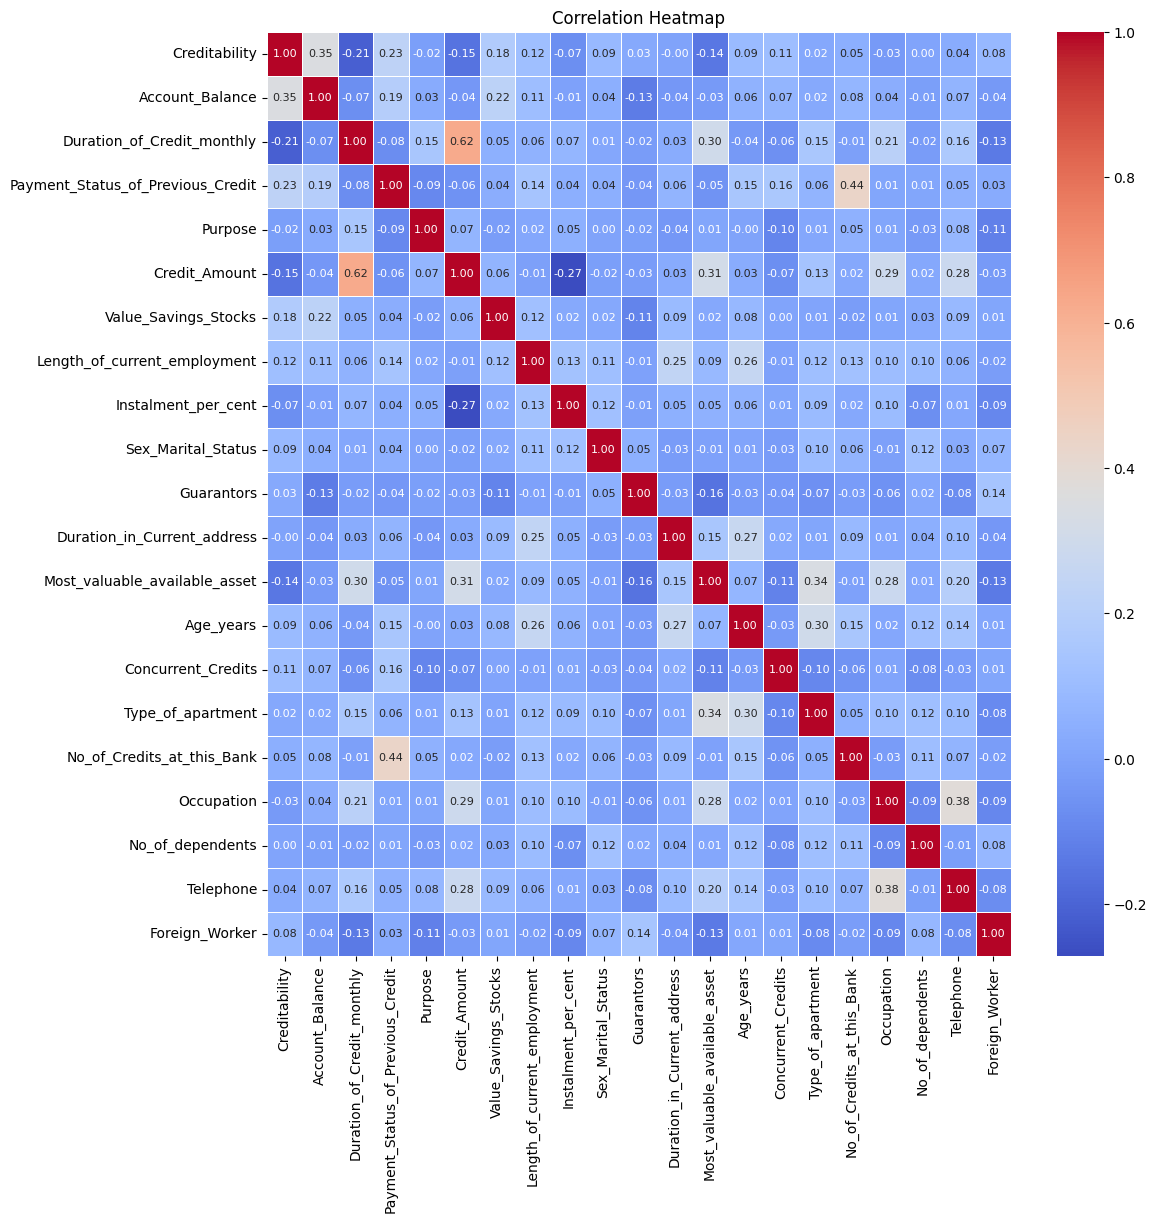

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_split.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size":8}, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Removing features with near zero correlation values (> ±0.05)**

No_of_dependents, Telephone, Occupation, Type_of_apartment, Duration_in_Current_address, Guarantors, Purpose

In [21]:
condensed_df = df_split.drop(['No_of_dependents', 'Telephone', 'Occupation', 'Type_of_apartment', 'Duration_in_Current_address', 'Guarantors', 'Purpose'], axis=1)
condensed_df

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Most_valuable_available_asset,Age_years,Concurrent_Credits,No_of_Credits_at_this_Bank,Foreign_Worker
0,1,1,18,4,1049,1,2,4,2,2,21,3,1,1
1,1,1,9,4,2799,1,3,2,3,1,36,3,2,1
2,1,2,12,2,841,2,4,2,2,1,23,3,1,1
3,1,1,12,4,2122,1,3,3,3,1,39,3,2,2
4,1,1,12,4,2171,1,3,4,3,2,38,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,1987,1,3,2,3,1,21,3,1,1
996,0,1,24,2,2303,1,5,4,3,1,45,3,1,1
997,0,4,21,4,12680,5,5,4,3,4,30,3,1,1
998,0,2,12,2,6468,5,1,2,3,4,52,3,1,1


**II. Data Cleaning**

Remaining objects require encoding for most models. Ordinal data received the label encoding treatment and nominal data was target encoded.

In [22]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.8 MB/s eta 0:00:00


In [25]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split

encoded_df = condensed_df.copy()

y = encoded_df['Creditability']

ordinal_features = ['Account_Balance', 'Payment_Status_of_Previous_Credit',
                    'Value_Savings_Stocks', 'Length_of_current_employment']

nominal_features = ['Sex_Marital_Status', 'Concurrent_Credits', 'Foreign_Worker']

# Label encoding
label_encoder = LabelEncoder()
for col in ordinal_features:
    if col in encoded_df.columns:
        encoded_df[col] = label_encoder.fit_transform(encoded_df[col])
    else:
        print(f"Column {col} not found in the DataFrame!")

# Target encoding
target_encoder = ce.TargetEncoder(cols=nominal_features)
encoded_df[nominal_features] = target_encoder.fit_transform(encoded_df[nominal_features], y)

**Train-test Split**

In [26]:
# Split the data
X = encoded_df.drop('Creditability', axis=1)
y = encoded_df['Creditability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.75
Confusion Matrix:
 [[ 26  36]
 [ 14 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.42      0.51        62
           1       0.78      0.90      0.83       138

    accuracy                           0.75       200
   macro avg       0.71      0.66      0.67       200
weighted avg       0.74      0.75      0.73       200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Random Forest Regression**

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.775
Confusion Matrix:
 [[ 29  33]
 [ 12 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.56        62
           1       0.79      0.91      0.85       138

    accuracy                           0.78       200
   macro avg       0.75      0.69      0.71       200
weighted avg       0.77      0.78      0.76       200



**Gradient Boosting Classifier**

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_gbc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbc))
print("Classification Report:\n", classification_report(y_test, y_pred_gbc))


Accuracy: 0.765
Confusion Matrix:
 [[ 31  31]
 [ 16 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.50      0.57        62
           1       0.80      0.88      0.84       138

    accuracy                           0.77       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.75      0.77      0.75       200



Logistic Regression AUC: 0.7809724170172979
Random Forest AUC: 0.7525128564749883
Gradient Boosting AUC: 0.7737260402057037


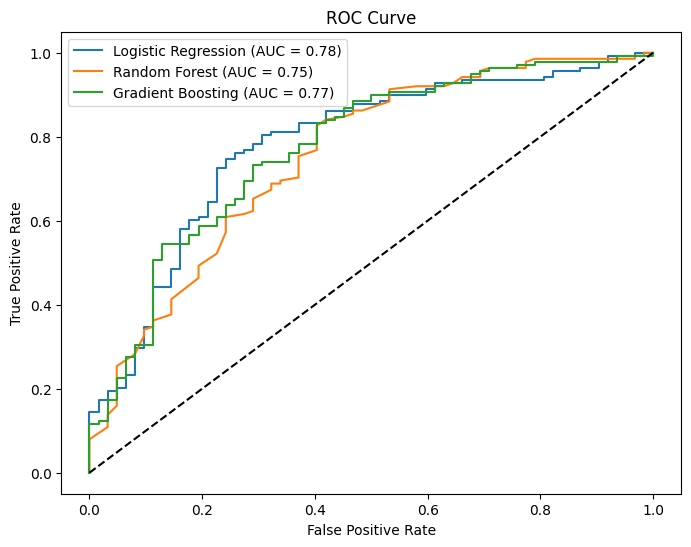

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve

logreg_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
gbc_auc = roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])

print("Logistic Regression AUC:", logreg_auc)
print("Random Forest AUC:", rf_auc)
print("Gradient Boosting AUC:", gbc_auc)

# Plot ROC curve for models
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, gbc.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label="Logistic Regression (AUC = %0.2f)" % logreg_auc)
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = %0.2f)" % rf_auc)
plt.plot(fpr_gbc, tpr_gbc, label="Gradient Boosting (AUC = %0.2f)" % gbc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#Summary

**Logistic Regression:**

* Precision for class 1: **0.78**

* Confusion Matrix: **FP = 36**, TP = 124

**Random Forest:**

* Precision for class 1: **0.79**

* Confusion Matrix: **FP = 33**, TP = 126

**Gradient Boosting:**

* Precision for class 1: **0.80**

* Confusion Matrix: **FP = 31**, TP = 122

# Conclusion

In the context of loan approval, it is most important for a model to minimize the amount of false positive approvals. Gradient Boosting proved to be the best fit for this task, boasting the highest precision for class 1 and the lowest amount of false positives.

**Recommending: Gradient Boosting Classification Model**